10가지 사물의 이미지가 있는 CIFAR-10 데이터를 학습하고 그 종류를 판단하는 모델을 모두 연결된 다 층 구조를 사용하여 만들어 봅시다. 학습데이터로 과적합을 방지하는 Dropout 에 대해 공부해봅시다.

Using TensorFlow backend.


train_images <class 'numpy.ndarray'> (50000, 32, 32, 3) uint8
train_labels <class 'numpy.ndarray'> (50000, 1) uint8
test_images <class 'numpy.ndarray'> (10000, 32, 32, 3) uint8
test_labels <class 'numpy.ndarray'> (10000, 1) int32


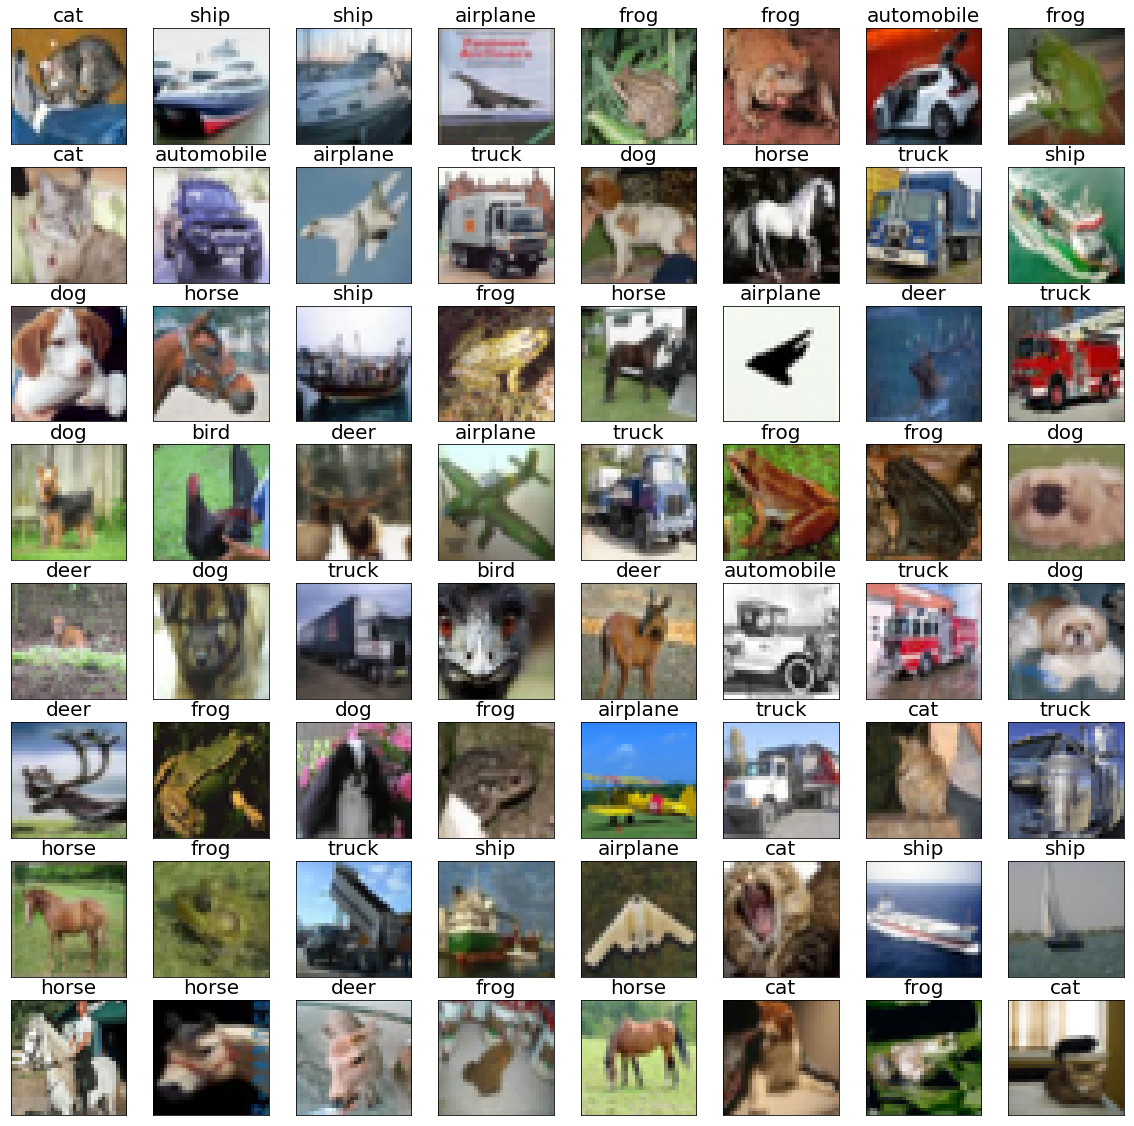

In [1]:
from keras import datasets, layers, models, utils
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

print( 'train_images', type(train_images), train_images.shape, train_images.dtype )
print( 'train_labels', type(train_labels), train_labels.shape, train_labels.dtype )
print( 'test_images', type(test_images), test_images.shape, test_images.dtype )
print( 'test_labels', type(test_labels), test_labels.shape, test_labels.dtype )

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck' ]

plt.figure( figsize=(20,20) )
for i in range(0, 8*8):
    plt.subplot(8,8,i+1)
    plt.xticks([]); plt.yticks([])
    plt.title( class_names[test_labels[i][0]], {'fontsize':20} )
    plt.imshow( test_images[i] )

다음과 같이 입력 데이터의 전처리를 해줍니다. 2차원 이미지를 1차원 데이터로 만들어 주고 최대값으로 나누어 정규화를 하고 double precision 까지는 필요가 없으므로 float32 자료형으로 변환합니다.

In [2]:
_, h, w, c = train_images.shape
train_x = ( train_images.reshape(-1, h*w*c) / 255 ).astype('float32')
test_x = ( test_images.reshape(-1, h*w*c) / 255 ).astype('float32')
print( 'test_x', type(test_x), test_x.shape, test_x.dtype )

test_x <class 'numpy.ndarray'> (10000, 3072) float32


레이블을 열개의 카테고리를 가진 데이터로 바꾸어 줍니다.

In [3]:
num_classes = 10

print( 'test_labels', test_labels.shape, test_labels.dtype )
print( 'test_labels[0] =', test_labels[0] )

train_y = utils.to_categorical(train_labels, num_classes)
test_y = utils.to_categorical(test_labels, num_classes)

print( 'test_y', test_y.shape, test_y.dtype )
print( 'test_y[0] =', test_y[0] )

test_labels (10000, 1) int32
test_labels[0] = [3]
test_y (10000, 10) float32
test_y[0] = [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


순차 모델을 사용해 모두 연결된 중간층 세개를 가진 모델을 만듭니다. Dropout 없이는 학습 데이터에 과적합되어 학습 지표와 검증 지표의 차이가 커지는것을 알 수 있습니다. 이러한 학습데이터에 과적합 되는것을 방지하기 위해 학습할 때 랜덤으로 일정한 비율의 뉴런을 골라 출력을 0 으로 만들어주는 Dropout layer 를 사용합니다. 출력을 0으로 만들어주는 것은 그 뉴런이 학습에 참여하지 않고 빠져있는것과 같은 효과를 줍니다. 학습이 다 끝난 후 모델을 사용할 때에는 Dropout 이 일어나지 않습니다.

In [4]:
model = models.Sequential()
model.add( layers.Dense(800, activation='relu', input_shape=(h*w*c,)))
model.add( layers.Dropout(0.1) )
model.add( layers.Dense(400, activation='relu' ) )
model.add( layers.Dropout(0.1) )
model.add( layers.Dense(100, activation='relu' ) )
model.add( layers.Dropout(0.1) )
model.add( layers.Dense(num_classes, activation='softmax') )
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 800)               2458400   
_________________________________________________________________
dropout_1 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 400)               320400    
_________________________________________________________________
dropout_2 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               40100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total para

softmax를 거친 category 출력에 주로 사용하는 categorical_crossentropy loss 함수를 사용합니다. 학습의 중간 결과로 정확성도 출력하기 위하여 accuracy 라는 측정 항목을 지정해 줍니다.

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 13s 337us/step - loss: 2.0348 - acc: 0.2504 - val_loss: 1.8843 - val_acc: 0.3176
Epoch 2/20
40000/40000 [==============================] - 13s 318us/step - loss: 1.8044 - acc: 0.3473 - val_loss: 1.7156 - val_acc: 0.3825
Epoch 3/20
40000/40000 [==============================] - 12s 312us/step - loss: 1.7320 - acc: 0.3765 - val_loss: 1.6968 - val_acc: 0.3956
Epoch 4/20
40000/40000 [==============================] - 13s 320us/step - loss: 1.6749 - acc: 0.4015 - val_loss: 1.5964 - val_acc: 0.4320
Epoch 5/20
40000/40000 [==============================] - 13s 334us/step - loss: 1.6342 - acc: 0.4146 - val_loss: 1.6152 - val_acc: 0.4241
Epoch 6/20
40000/40000 [==============================] - 13s 325us/step - loss: 1.6059 - acc: 0.4226 - val_loss: 1.5619 - val_acc: 0.4404
Epoch 7/20
40000/40000 [==============================] - 13s 316us/step - loss: 1.5710 - acc: 0.4381 - val_loss: 1.

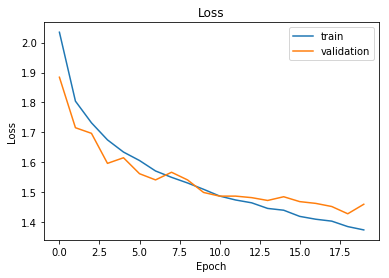

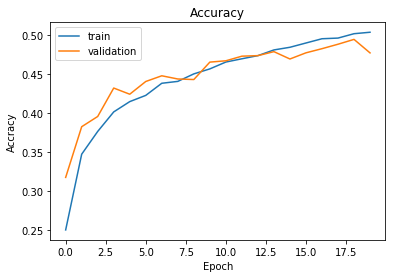

10000/10000 [==============================] - 1s 54us/step
[loss, accuracy] = [1.4397651544570922, 0.4802]


In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_x, train_y, epochs=20, batch_size=128, validation_split=0.2)

from modules.plot_history import plot_loss, plot_acc
plot_loss(hist, 'Loss')
plt.show()
plot_acc(hist, 'Accuracy')
plt.show()

evaluation = model.evaluate( test_x, test_y, batch_size=64)
print( '[loss, accuracy] =', evaluation )

검증데이터로 모델에 입력을 넣어 어떠한 출력이 나오는지 확인해봅시다.

y_pred (10000, 10) float32
y_pred[0] [0.03844486 0.00708085 0.0842734  0.39670444 0.08491276 0.29364377
 0.04893594 0.00709691 0.02970673 0.0092003 ]
class_pred (10000,) int64
class_pred[0] 3


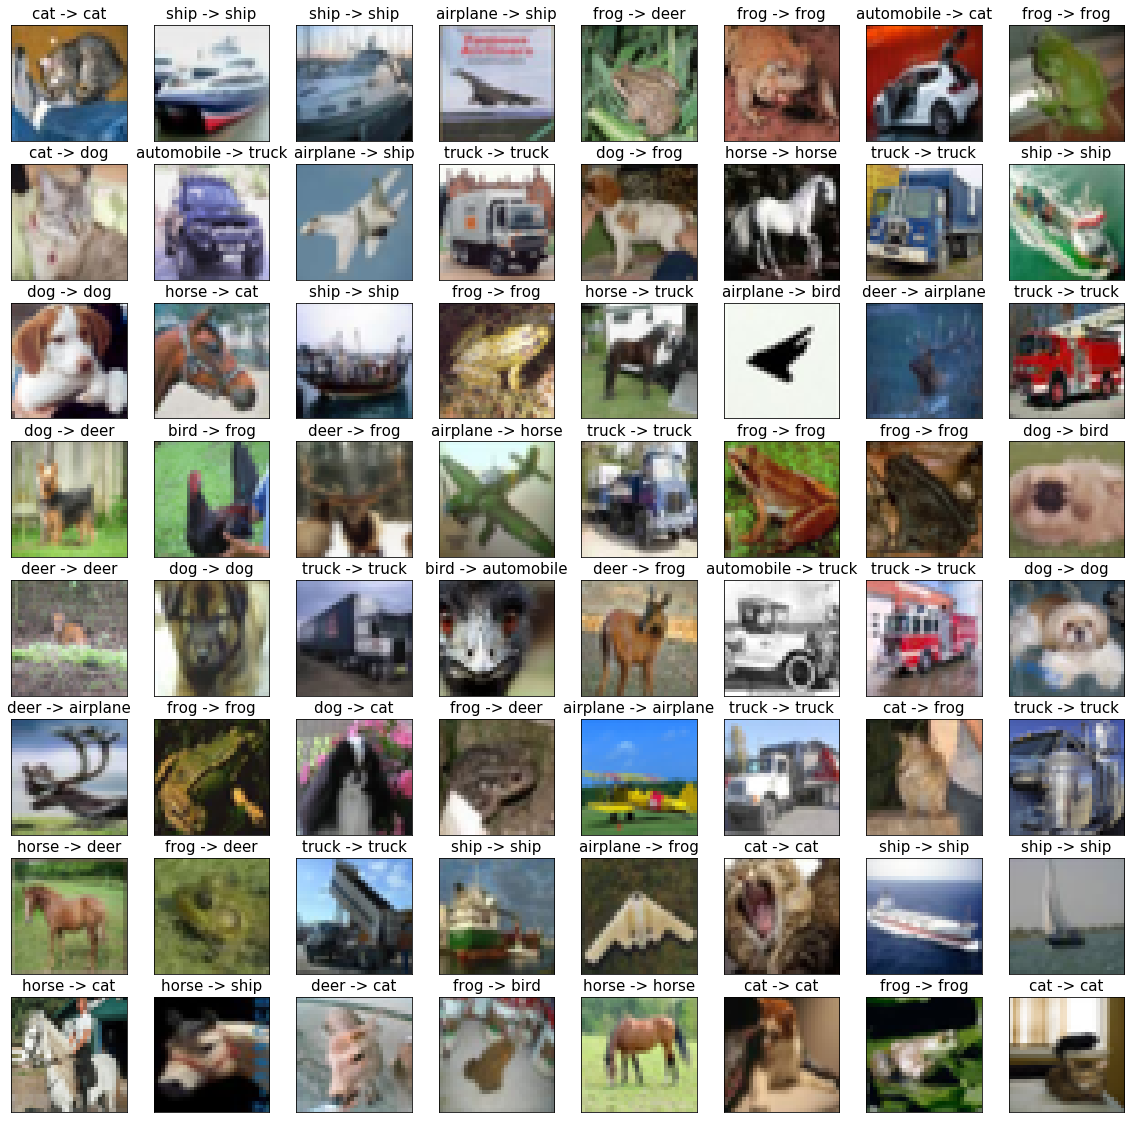

In [6]:
y_pred = model.predict(test_x)
print('y_pred', y_pred.shape, y_pred.dtype)
print('y_pred[0]', y_pred[0])

#class_pred = model.predict_classes( test_x ) # only for sequential model
class_pred = np.argmax(y_pred, axis=1)
print('class_pred', class_pred.shape, class_pred.dtype)
print('class_pred[0]', class_pred[0])

plt.figure( figsize=(20,20) )
for i in range(0,8*8):
    plt.subplot(8,8,i+1)
    plt.xticks([]); plt.yticks([])
    plt.title(class_names[test_labels[i][0]] + ' -> '  +
              class_names[class_pred[i]], {'fontsize':15} )
    plt.imshow( test_images[i] )